In [1]:
# Citation Request:
# This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
# Please include this citation if you plan to use this database:
# [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Loading data
Data = pd.DataFrame (pd.read_csv("bank-additional/bank-additional/bank-additional-full.csv",  delimiter=';'))
Data = Data.dropna()
print(Data.shape)
print(list(Data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
Data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
Data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

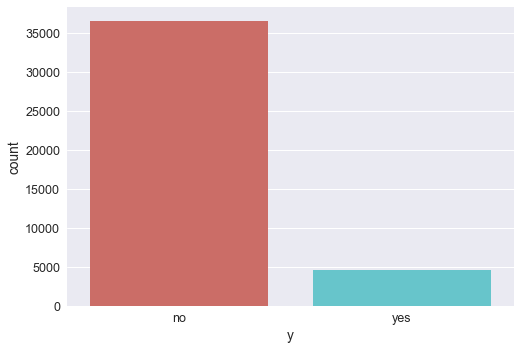

In [6]:
#Barplot for the dependent variable: Has the client subscribed a term deposit? (yes or no)
sns.set(font_scale=1.25)
sns.countplot(x='y',data=Data, palette='hls')
plt.show()

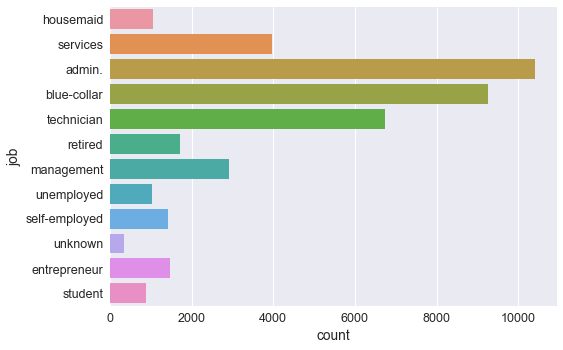

In [7]:
#Customers job distribution
sns.set(font_scale=1.25)
sns.countplot(y="job", data=Data)
plt.show()

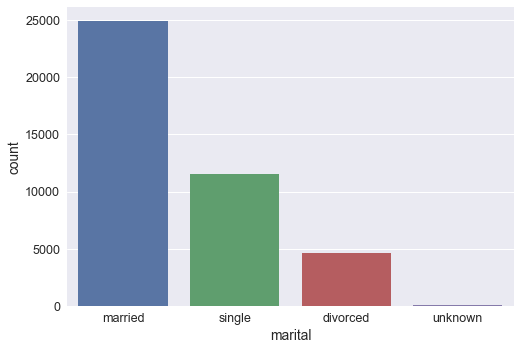

In [8]:
# Customers marital status
sns.set(font_scale=1.25)
sns.countplot(x="marital", data=Data)
plt.show()

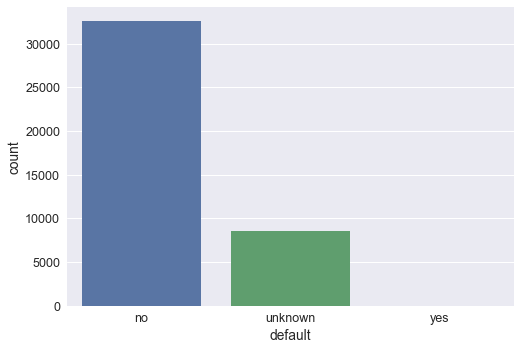

In [9]:
# Customers credit in default
sns.set(font_scale=1.25)
sns.countplot(x="default", data=Data)
plt.show()

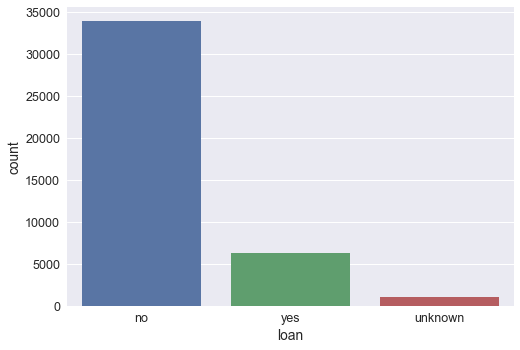

In [10]:
# Customers personal loans
sns.set(font_scale=1.25)
sns.countplot(x="loan", data=Data)
plt.show()

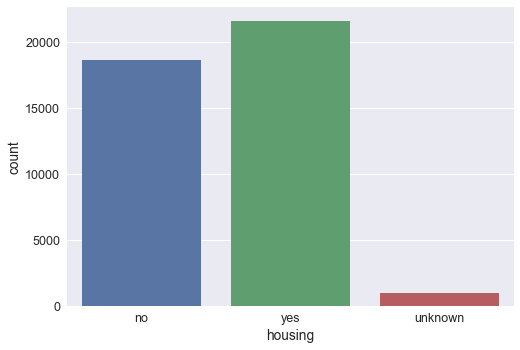

In [11]:
# Customers housing loan
sns.set(font_scale=1.25)
sns.countplot(x="housing", data=Data)
plt.show()

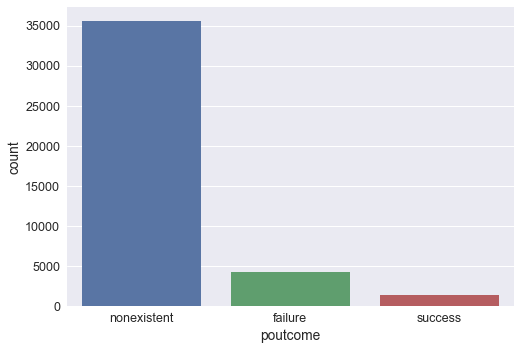

In [12]:
# Previous marketing campaign outcomes
sns.set(font_scale=1.25)
sns.countplot(x="poutcome", data=Data)
plt.show()

In [13]:
# We want to bluid our prediction using the customer’s job, 
# marital status, credit in default, housing loan, personal loan, 
# and the outcome of the previous marketing campaigns. 
#Therefore we are dropping the variables we do not need.

Data.drop(Data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [14]:
# Creation of dummie variables

Data_dum = pd.get_dummies(Data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [15]:
# Dropping of unkown columns

Data_dum.drop(Data_dum.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
Data_dum.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

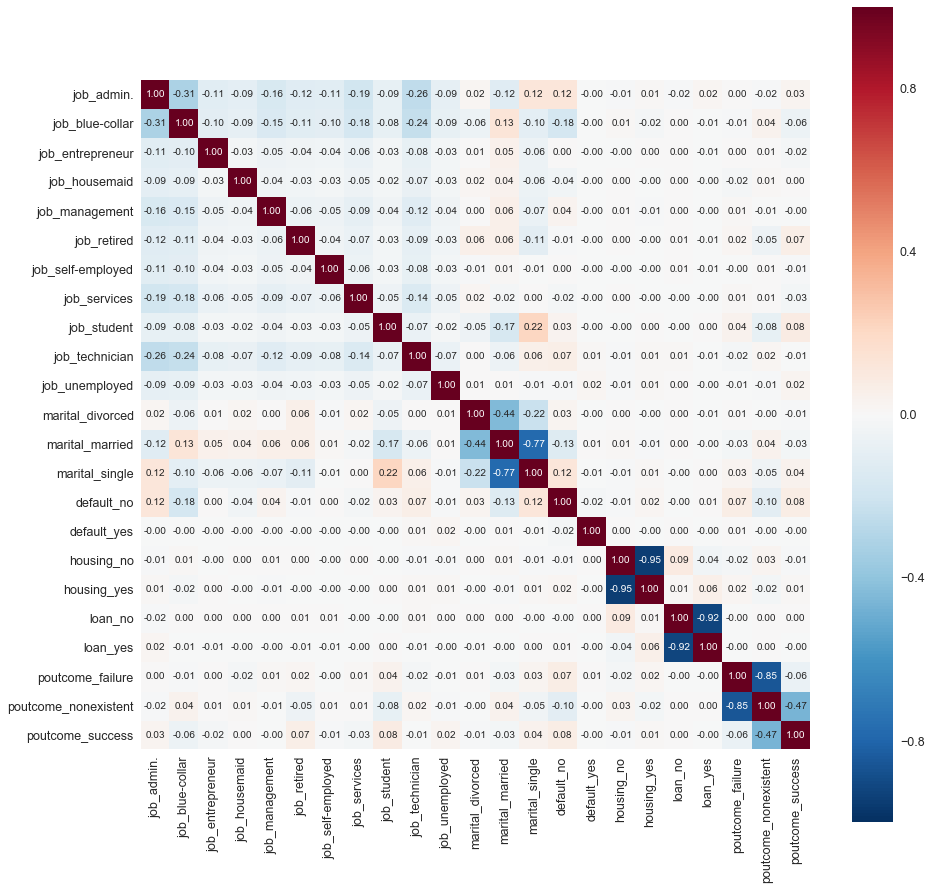

In [16]:
# Checking correlation between variables
ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
sns.heatmap(Data_dum.corr(),annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [17]:
# Let us spit the data in training and testing sets

X = Data_dum.iloc[:,1:]
y = Data_dum.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [18]:
X_train.shape

(30891, 23)

In [19]:
# Setting up the classifier
classifier = LogisticRegression(random_state=7)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=7, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# Test set prediction and creation of the confusion matrix
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9080  103]
 [ 926  188]]


In [21]:
#Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [22]:
# Evaluation of: precision, recall, F-measure and support

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         no       0.91      0.99      0.95      9183
        yes       0.65      0.17      0.27      1114

avg / total       0.88      0.90      0.87     10297



In [23]:
import itertools as itt

def getit(n, excl):
  if n*n > len(np.unique(excl)): return getit(n, np.append(excl if len(excl) > 0 else np.empty((0, n), int) , np.array([[m for m in [tup for tup in itt.islice(filter(lambda x: sum(x)==n*(n*n+1)/2, itt.combinations(set(range(1,n*n+1))-set(np.unique(excl)), n)), 1)][0]]]),axis=0)); 
  else : return excl


print(getit(2,[]))

[[1 4]
 [2 3]]


In [24]:
import itertools as itt
import numpy as np

def getit(n, excl):
  if n*n > len(np.unique(excl)): return getit(n, np.append(excl if len(excl) > 0 else np.empty((0, n), int) , np.array([[m for m in [tup for tup in itt.islice(filter(lambda x: sum(x)==n*(n*n+1)/2, itt.combinations(set(range(1,n*n+1))-set(np.unique(excl)), n)), 1)][0]]]),axis=0)); 
  else : return excl


print(getit(3,[]))

[[1 5 9]
 [2 6 7]
 [8 3 4]]


In [25]:
import itertools as itt

def getit(n, excl):
  if n*n > len(np.unique(excl)): return getit(n, np.append(excl if len(excl) > 0 else np.empty((0, n), int) , np.array([[m for m in [tup for tup in itt.islice(filter(lambda x: sum(x)==n*(n*n+1)/2, itt.combinations(set(range(1,n*n+1))-set(np.unique(excl)), n)), 1)][0]]]),axis=0)); 
  else : return excl


print(getit(4,[]))

[[ 1  2 15 16]
 [ 3  4 13 14]
 [ 5  6 11 12]
 [ 8  9 10  7]]


In [26]:
import itertools as itt

def getit(n, excl):
  if n*n > len(np.unique(excl)): return getit(n, np.append(excl if len(excl) > 0 else np.empty((0, n), int) , np.array([[m for m in [tup for tup in itt.islice(filter(lambda x: sum(x)==n*(n*n+1)/2, itt.combinations(set(range(1,n*n+1))-set(np.unique(excl)), n)), 1)][0]]]),axis=0)); 
  else : return excl


print(getit(5,[]))

[[ 1  2 13 24 25]
 [ 3  4 14 21 23]
 [ 5  6 12 20 22]
 [ 7  8 15 16 19]
 [18  9 10 11 17]]


In [27]:
import itertools as itt

def getit(n, excl):
  if n*n > len(np.unique(excl)): return getit(n, np.append(excl if len(excl) > 0 else np.empty((0, n), int) , np.array([[m for m in [tup for tup in itt.islice(filter(lambda x: sum(x)==n*(n*n+1)/2, itt.combinations(set(range(1,n*n+1))-set(np.unique(excl)), n)), 1)][0]]]),axis=0)); 
  else : return excl


print(getit(6,[]))

[[ 1  2  3 34 35 36]
 [ 4  5  6 31 32 33]
 [ 7  8  9 28 29 30]
 [10 11 12 25 26 27]
 [13 14 15 22 23 24]
 [16 17 18 19 20 21]]


In [28]:
import itertools as itt
#import numpy as np

def getit(n, excl):
  if n*n > len(np.unique(excl)): return getit(n, np.append(excl if len(excl) > 0 else np.empty((0, n), int) , np.array([[m for m in [tup for tup in itt.islice(filter(lambda x: sum(x)==n*(n*n+1)/2, itt.combinations(set(range(1,n*n+1))-set(np.unique(excl)), n)), 1)][0]]]),axis=0)); 
  else : return excl


print(getit(7,[]))

[[ 1  2  3 25 47 48 49]
 [ 4  5  6 26 43 45 46]
 [ 7  8  9 24 41 42 44]
 [10 11 12 27 36 39 40]
 [32 33 34 13 14 18 31]
 [35 37 15 16 19 23 30]
 [38 17 20 21 22 28 29]]


In [29]:
import itertools as itt
#import numpy as np

def getit(n, excl):
  if n*n > len(np.unique(excl)): return getit(n, np.append(excl if len(excl) > 0 else np.empty((0, n), int) , np.array([[m for m in [tup for tup in itt.islice(filter(lambda x: sum(x)==n*(n*n+1)/2, itt.combinations(set(range(1,n*n+1))-set(np.unique(excl)), n)), 1)][0]]]),axis=0)); 
  else : return excl


print(getit(8,[]))

[[ 1  2  3  4 61 62 63 64]
 [ 5  6  7  8 57 58 59 60]
 [ 9 10 11 12 53 54 55 56]
 [13 14 15 16 49 50 51 52]
 [17 18 19 20 45 46 47 48]
 [21 22 23 24 41 42 43 44]
 [32 33 34 35 36 37 25 28]
 [38 39 40 26 27 29 30 31]]


In [30]:
import itertools as itt
#import numpy as np

def getit(n, excl):
  if n*n > len(np.unique(excl)): return getit(n, np.append(excl if len(excl) > 0 else np.empty((0, n), int) , np.array([[m for m in [tup for tup in itt.islice(filter(lambda x: sum(x)==n*(n*n+1)/2, itt.combinations(set(range(1,n*n+1))-set(np.unique(excl)), n)), 1)][0]]]),axis=0)); 
  else : return excl


print(getit(9,[]))

[[ 1  2  3  4 41 78 79 80 81]
 [ 5  6  7  8 42 73 75 76 77]
 [ 9 10 11 12 40 70 71 72 74]
 [13 14 15 16 43 64 67 68 69]
 [17 18 19 20 39 62 63 65 66]
 [21 22 23 24 44 55 59 60 61]
 [25 26 27 28 38 54 56 57 58]
 [32 33 34 35 36 45 49 52 53]
 [37 46 47 48 50 51 29 30 31]]


In [31]:
import itertools as itt
#import numpy as np

def getit(n, excl):
  if n*n > len(np.unique(excl)): return getit(n, np.append(excl if len(excl) > 0 else np.empty((0, n), int) , np.array([[m for m in [tup for tup in itt.islice(filter(lambda x: sum(x)==n*(n*n+1)/2, itt.combinations(set(range(1,n*n+1))-set(np.unique(excl)), n)), 1)][0]]]),axis=0)); 
  else : return excl


print(getit(10,[]))

[[  1   2   3   4   5  96  97  98  99 100]
 [  6   7   8   9  10  91  92  93  94  95]
 [ 11  12  13  14  15  86  87  88  89  90]
 [ 16  17  18  19  20  81  82  83  84  85]
 [ 21  22  23  24  25  76  77  78  79  80]
 [ 26  27  28  29  30  71  72  73  74  75]
 [ 31  32  33  34  35  66  67  68  69  70]
 [ 36  37  38  39  40  61  62  63  64  65]
 [ 41  42  43  44  45  56  57  58  59  60]
 [ 46  47  48  49  50  51  52  53  54  55]]
